In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
import csv
import json
import os
import xgboost.sklearn as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

In [58]:
# 从文件load到numpy array
# 读入service_type==1的训练数据
x_train_1 = np.load('preprocessed/x_train_1.npy')
x_validation_1 = np.load('preprocessed/x_validation_1.npy')
y_train_1 = np.load('preprocessed/y_train_1.npy')
y_validation_1 = np.load('preprocessed/y_validation_1.npy')
# 读入service_type==4的训练数据
x_train_4 = np.load('preprocessed/x_train_4.npy')
x_validation_4 = np.load('preprocessed/x_validation_4.npy')
y_train_4 = np.load('preprocessed/y_train_4.npy')
y_validation_4 = np.load('preprocessed/y_validation_4.npy')
# 读入测试数据
x_test = np.load('preprocessed/x_test.npy')
csv_file = csv.reader(open('preprocessed/id_all_test.csv', 'r'))
id_test = []
for line in csv_file:
    id_test.append(line[0])

x_test = np.load('preprocessed/x_test.npy')

print(x_test[0])
print(id_test[0])

label_1 = {90063345: 0, 90109916: 1, 90155946: 2}
label_4 = {89950168: 0, 89950166: 1, 99999828: 2, 99999827: 3,
           99999830: 4, 89950167: 5, 99999826: 6, 99999825: 7}

for index in range(len(y_train_1)):
    y_train_1[index] = label_1[y_train_1[index]]

print(y_train_1[101])

for index in range(len(y_validation_1)):
    y_validation_1[index] = label_1[y_validation_1[index]]

print(y_validation_1[101])

for index in range(len(y_train_4)):
    y_train_4[index] = label_4[y_train_4[index]]

print(y_train_4[101])

for index in range(len(y_validation_4)):
    y_validation_4[index] = label_4[y_validation_4[index]]

print(y_validation_4[101])


[ 1.00000000e+00  0.00000000e+00  1.80000000e+01  5.04000000e+01
  1.08200000e+02  1.18900000e+02  1.77700000e+02  3.00000000e+02
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.00000000e+00  2.00000000e+00  6.00000000e+01  0.00000000e+00
  2.63908486e+03  3.77833333e+01  3.77833333e+01  0.00000000e+00
  1.00000000e+00  1.90000000e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.78000000e+01 -1.07000000e+01 -5.88000000e+01
  9.60000000e+00  3.00000000e+02  8.71930804e-02  1.13800000e+02
  1.77700000e+02  5.04000000e+01  3.77833333e+01  0.00000000e+00
  1.00000000e+00  2.93908486e+03  1.02072589e-01  0.00000000e+00
  4.47325000e+01  5.04000000e+01 -3.96000000e+01]
012pSke7DsCrR985
0
0
5
1


In [50]:
cat_cols = ['contract_type', 'net_service', 'gender', 'complaint_level',       
   'is_mix_service',  'many_over_bill', 'is_promise_low_consume',     
    ]

all_cols = ['is_mix_service','online_time','1_total_fee','2_total_fee','3_total_fee','4_total_fee',
    'month_traffic','many_over_bill','contract_type','contract_time','is_promise_low_consume','net_service',
    'pay_times','pay_num','last_month_traffic','local_trafffic_month','local_caller_time','service1_caller_time',
    'service2_caller_time','gender','age','complaint_level','former_complaint_num','former_complaint_fee'
    ]

In [60]:
print("begin build")
targetlabel_1 = [0, 1, 2]
from sklearn.metrics import f1_score
def evalerror(preds, lgtrain):
    preds = np.argmax(preds.reshape( len(y_validation_1), 3 ),axis = 1)   #转化为类别
    y_true = lgtrain.get_label()
    result = f1_score(y_true,preds,labels = targetlabel_1,average = 'macro')
    return 'f1_score',result

model_1 = XGBClassifier(learning_rate=0.05, #典型值为0.01-0.2
                       n_estimators=800,         
                       max_depth=6,               # 树的深度,值越大，越容易过拟合；值越小，越容易欠拟合
                       min_child_weight = 1,      # 叶子节点最小权重 值越大，越容易欠拟合；值越小，越容易过拟合
                       subsample=0.7,             # 随机选择80%样本建立决策树 防止overfitting
                       colsample_btree=0.7,       # 随机选择80%特征建立决策树 防止overfitting
                       objective='multi:softprob', # 指定损失函数
                       scale_pos_weight=1,        # 解决样本个数不平衡的问题
                       random_state=27,            # 随机数
                        n_class = 3,
                       eta= 0.02,
                       nthread=-1,
                       seed = 66
                     )
print("begin fit")
#watchlist=[(xgb_train,'train'), (xgb_test,'eval')]
watchlist = [(x_train_1,y_train_1),(x_validation_1,y_validation_1)]
import xgboost.callback as call
early_stop = call.early_stop(stopping_rounds = 100, maximize=True, verbose=10)
model_1.fit(x_train_1,
           y_train_1,
           eval_set = [(x_validation_1,y_validation_1)],
            #eval_set = watchlist,
           #eval_metric = "merror",   
            eval_metric = evalerror,
            callbacks = [early_stop],
         ) 

begin build
begin fit
Multiple eval metrics have been passed: 'validation_0-f1_score' will be used for early stopping.

Will train until validation_0-f1_score hasn't improved in 100 rounds.
[0]	validation_0-merror:0.010692	validation_0-f1_score:0.97184
[1]	validation_0-merror:0.010476	validation_0-f1_score:0.972089
[2]	validation_0-merror:0.010278	validation_0-f1_score:0.972558
[3]	validation_0-merror:0.010124	validation_0-f1_score:0.973012
[4]	validation_0-merror:0.010061	validation_0-f1_score:0.973068
[5]	validation_0-merror:0.010088	validation_0-f1_score:0.973036
[6]	validation_0-merror:0.010133	validation_0-f1_score:0.972925
[7]	validation_0-merror:0.010007	validation_0-f1_score:0.973284
[8]	validation_0-merror:0.010061	validation_0-f1_score:0.973167
[9]	validation_0-merror:0.009989	validation_0-f1_score:0.973395
[10]	validation_0-merror:0.010025	validation_0-f1_score:0.973262
[11]	validation_0-merror:0.00989	validation_0-f1_score:0.973557
[12]	validation_0-merror:0.009935	validati

[124]	validation_0-merror:0.005346	validation_0-f1_score:0.985382
[125]	validation_0-merror:0.005364	validation_0-f1_score:0.985338
[126]	validation_0-merror:0.005319	validation_0-f1_score:0.985459
[127]	validation_0-merror:0.00531	validation_0-f1_score:0.985474
[128]	validation_0-merror:0.005247	validation_0-f1_score:0.985625
[129]	validation_0-merror:0.005229	validation_0-f1_score:0.985699
[130]	validation_0-merror:0.005256	validation_0-f1_score:0.985609
[131]	validation_0-merror:0.005247	validation_0-f1_score:0.985636
[132]	validation_0-merror:0.005211	validation_0-f1_score:0.985754
[133]	validation_0-merror:0.00522	validation_0-f1_score:0.985714
[134]	validation_0-merror:0.005229	validation_0-f1_score:0.985699
[135]	validation_0-merror:0.00522	validation_0-f1_score:0.985703
[136]	validation_0-merror:0.005256	validation_0-f1_score:0.985608
[137]	validation_0-merror:0.005238	validation_0-f1_score:0.985649
[138]	validation_0-merror:0.005184	validation_0-f1_score:0.985808
[139]	validat

[249]	validation_0-merror:0.004724	validation_0-f1_score:0.986957
[250]	validation_0-merror:0.004715	validation_0-f1_score:0.986984
[251]	validation_0-merror:0.004715	validation_0-f1_score:0.986971
[252]	validation_0-merror:0.004706	validation_0-f1_score:0.987011
[253]	validation_0-merror:0.004679	validation_0-f1_score:0.987088
[254]	validation_0-merror:0.004688	validation_0-f1_score:0.987063
[255]	validation_0-merror:0.004688	validation_0-f1_score:0.987053
[256]	validation_0-merror:0.004688	validation_0-f1_score:0.987053
[257]	validation_0-merror:0.004688	validation_0-f1_score:0.987064
[258]	validation_0-merror:0.004661	validation_0-f1_score:0.987142
[259]	validation_0-merror:0.004643	validation_0-f1_score:0.987182
[260]	validation_0-merror:0.00467	validation_0-f1_score:0.987116
[261]	validation_0-merror:0.004652	validation_0-f1_score:0.987155
[262]	validation_0-merror:0.004652	validation_0-f1_score:0.987167
[263]	validation_0-merror:0.004634	validation_0-f1_score:0.987208
[264]	valid

[374]	validation_0-merror:0.004499	validation_0-f1_score:0.98747
[375]	validation_0-merror:0.004472	validation_0-f1_score:0.987559
[376]	validation_0-merror:0.00449	validation_0-f1_score:0.987495
[377]	validation_0-merror:0.00449	validation_0-f1_score:0.987495
[378]	validation_0-merror:0.004472	validation_0-f1_score:0.987559
[379]	validation_0-merror:0.004481	validation_0-f1_score:0.987535
[380]	validation_0-merror:0.004481	validation_0-f1_score:0.987522
[381]	validation_0-merror:0.00449	validation_0-f1_score:0.987497
[382]	validation_0-merror:0.004472	validation_0-f1_score:0.987575
[383]	validation_0-merror:0.004463	validation_0-f1_score:0.987592
[384]	validation_0-merror:0.004463	validation_0-f1_score:0.98758
[385]	validation_0-merror:0.004454	validation_0-f1_score:0.987583
[386]	validation_0-merror:0.004454	validation_0-f1_score:0.987604
[387]	validation_0-merror:0.004463	validation_0-f1_score:0.987567
[388]	validation_0-merror:0.004463	validation_0-f1_score:0.987575
[389]	validatio

[499]	validation_0-merror:0.004336	validation_0-f1_score:0.987907
[500]	validation_0-merror:0.004327	validation_0-f1_score:0.987934
[501]	validation_0-merror:0.004327	validation_0-f1_score:0.987934
[502]	validation_0-merror:0.0043	validation_0-f1_score:0.988002
[503]	validation_0-merror:0.0043	validation_0-f1_score:0.988002
[504]	validation_0-merror:0.0043	validation_0-f1_score:0.988013
[505]	validation_0-merror:0.004309	validation_0-f1_score:0.987998
[506]	validation_0-merror:0.0043	validation_0-f1_score:0.988024
[507]	validation_0-merror:0.004291	validation_0-f1_score:0.98804
[508]	validation_0-merror:0.0043	validation_0-f1_score:0.988013
[509]	validation_0-merror:0.004291	validation_0-f1_score:0.98804
[510]	validation_0-merror:0.0043	validation_0-f1_score:0.988013
[511]	validation_0-merror:0.0043	validation_0-f1_score:0.988012
[512]	validation_0-merror:0.004318	validation_0-f1_score:0.987948
[513]	validation_0-merror:0.0043	validation_0-f1_score:0.988003
[514]	validation_0-merror:0.

[624]	validation_0-merror:0.004228	validation_0-f1_score:0.98818
[625]	validation_0-merror:0.004237	validation_0-f1_score:0.988154
[626]	validation_0-merror:0.004237	validation_0-f1_score:0.988152
[627]	validation_0-merror:0.004246	validation_0-f1_score:0.988127
[628]	validation_0-merror:0.004246	validation_0-f1_score:0.988127
[629]	validation_0-merror:0.004237	validation_0-f1_score:0.988154
[630]	validation_0-merror:0.004255	validation_0-f1_score:0.988102
[631]	validation_0-merror:0.004246	validation_0-f1_score:0.988128
[632]	validation_0-merror:0.004228	validation_0-f1_score:0.98819
[633]	validation_0-merror:0.004237	validation_0-f1_score:0.988164
[634]	validation_0-merror:0.004228	validation_0-f1_score:0.98819
[635]	validation_0-merror:0.004228	validation_0-f1_score:0.988192
[636]	validation_0-merror:0.00421	validation_0-f1_score:0.988231
[637]	validation_0-merror:0.004264	validation_0-f1_score:0.988085
[638]	validation_0-merror:0.004237	validation_0-f1_score:0.988165
[639]	validati

[749]	validation_0-merror:0.004228	validation_0-f1_score:0.988205
[750]	validation_0-merror:0.004228	validation_0-f1_score:0.988205
[751]	validation_0-merror:0.004219	validation_0-f1_score:0.988241
[752]	validation_0-merror:0.004228	validation_0-f1_score:0.988205
[753]	validation_0-merror:0.004237	validation_0-f1_score:0.98818
[754]	validation_0-merror:0.004219	validation_0-f1_score:0.988221
[755]	validation_0-merror:0.004219	validation_0-f1_score:0.988221
[756]	validation_0-merror:0.004219	validation_0-f1_score:0.988224
[757]	validation_0-merror:0.00421	validation_0-f1_score:0.98826
[758]	validation_0-merror:0.004219	validation_0-f1_score:0.988233
[759]	validation_0-merror:0.00421	validation_0-f1_score:0.988257
[760]	validation_0-merror:0.00421	validation_0-f1_score:0.988245
[761]	validation_0-merror:0.00421	validation_0-f1_score:0.988256
[762]	validation_0-merror:0.00421	validation_0-f1_score:0.988247
[763]	validation_0-merror:0.004201	validation_0-f1_score:0.988263
[764]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_btree=0.7,
       colsample_bylevel=1, colsample_bytree=1, eta=0.02, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_class=3, n_estimators=800,
       n_jobs=1, nthread=-1, objective='multi:softprob', random_state=27,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=66, silent=True,
       subsample=0.7)

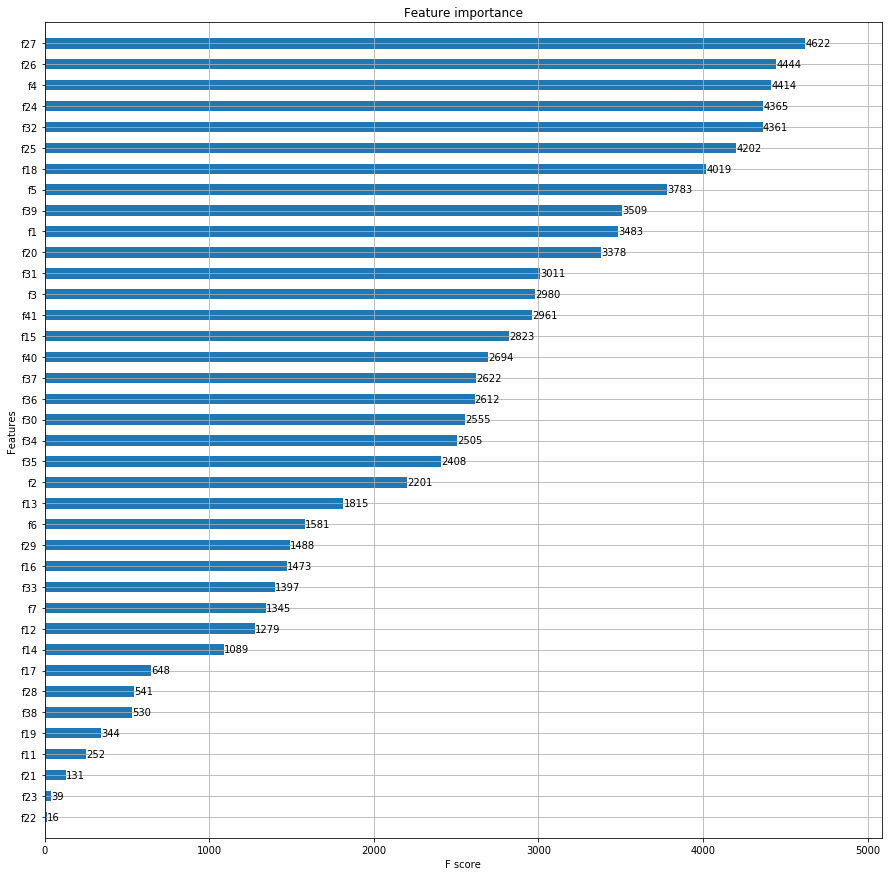

Accuracy: 99.58%
0.9882145464659761


In [61]:
### plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig_1,ax_1 = plt.subplots(figsize=(15,15))
plot_importance(model_1,
                height=0.5,
                ax=ax_1,
                max_num_features=64)
plt.show()

### make prediction for test data
#y_predicted_1 = model_1.predict(x_validation_1)
y_predicted_1_prob = model_1.predict_proba(x_validation_1,ntree_limit=788)

y_predicted_1 = np.argmax(y_predicted_1_prob.reshape( len(y_validation_1), 3 ),axis = 1)   #转化为类别

accuracy_1 = accuracy_score(y_validation_1, y_predicted_1)
print("Accuracy: %.2f%%" % (accuracy_1 * 100.0))

from sklearn.metrics import f1_score
 
targetlabel_1 = ['90063345', '90109916','90155946']
score_1 = f1_score(y_validation_1, y_predicted_1, average='macro')
print(score_1)

In [ ]:
print("begin build")
targetlabel_4 = [0, 1, 2, 3, 4, 5, 6, 7]
from sklearn.metrics import f1_score
def evalerror(preds, lgtrain):
    preds = np.argmax(preds.reshape( len(y_validation_4), 8 ),axis = 1)   #转化为类别
    y_true = lgtrain.get_label()
    result = f1_score(y_true,preds,labels = targetlabel_4,average = 'macro')
    return 'f1_score',result

model_4 = XGBClassifier(learning_rate=0.03, #典型值为0.01-0.2
                       n_estimators=1000,         
                       max_depth=6,               # 树的深度,值越大，越容易过拟合；值越小，越容易欠拟合
                       #min_child_weight = 1,      # 叶子节点最小权重 值越大，越容易欠拟合；值越小，越容易过拟合
                       subsample=0.7,             # 随机选择80%样本建立决策树 防止overfitting
                       colsample_btree=0.7,       # 随机选择80%特征建立决策树 防止overfitting
                       objective='multi:softprob', # 指定损失函数
                       random_state=27,            # 随机数
                        n_class = 8,
                       eta= 0.02,
                       nthread=-1,
                       seed = 66
                     )
print("begin fit")
#watchlist=[(xgb_train,'train'), (xgb_test,'eval')]
watchlist = [(x_train_4,y_train_4),(x_validation_4,y_validation_4)]
import xgboost.callback as call
early_stop = call.early_stop(stopping_rounds = 50, maximize=True, verbose=True)
model_4.fit(x_train_4,
           y_train_4,
           eval_set = [(x_validation_4,y_validation_4)],
            #eval_set = watchlist,
           #eval_metric = "merror",   
            eval_metric = evalerror,
            callbacks = [early_stop],
         ) 

begin build
begin fit
Multiple eval metrics have been passed: 'validation_0-f1_score' will be used for early stopping.

Will train until validation_0-f1_score hasn't improved in 50 rounds.
[0]	validation_0-merror:0.210968	validation_0-f1_score:0.754417
[1]	validation_0-merror:0.207982	validation_0-f1_score:0.757626
[2]	validation_0-merror:0.207566	validation_0-f1_score:0.757626
[3]	validation_0-merror:0.206514	validation_0-f1_score:0.758456
[4]	validation_0-merror:0.2053	validation_0-f1_score:0.759519
[5]	validation_0-merror:0.203993	validation_0-f1_score:0.760846
[6]	validation_0-merror:0.204664	validation_0-f1_score:0.760182
[7]	validation_0-merror:0.204672	validation_0-f1_score:0.760415
[8]	validation_0-merror:0.203688	validation_0-f1_score:0.761111
[9]	validation_0-merror:0.203085	validation_0-f1_score:0.761238
[10]	validation_0-merror:0.202262	validation_0-f1_score:0.762077
[11]	validation_0-merror:0.201906	validation_0-f1_score:0.761912
[12]	validation_0-merror:0.201431	validatio

[124]	validation_0-merror:0.160148	validation_0-f1_score:0.815009
[125]	validation_0-merror:0.15958	validation_0-f1_score:0.815727
[126]	validation_0-merror:0.159325	validation_0-f1_score:0.816044
[127]	validation_0-merror:0.159156	validation_0-f1_score:0.816257
[128]	validation_0-merror:0.158892	validation_0-f1_score:0.816558
[129]	validation_0-merror:0.157917	validation_0-f1_score:0.817582
[130]	validation_0-merror:0.157713	validation_0-f1_score:0.817747
[131]	validation_0-merror:0.157467	validation_0-f1_score:0.818084
[132]	validation_0-merror:0.157144	validation_0-f1_score:0.818467
[133]	validation_0-merror:0.157077	validation_0-f1_score:0.818513
[134]	validation_0-merror:0.156941	validation_0-f1_score:0.818661
[135]	validation_0-merror:0.156763	validation_0-f1_score:0.818899
[136]	validation_0-merror:0.156635	validation_0-f1_score:0.819111
[137]	validation_0-merror:0.156423	validation_0-f1_score:0.819363
[138]	validation_0-merror:0.156423	validation_0-f1_score:0.819319
[139]	valid

[249]	validation_0-merror:0.143313	validation_0-f1_score:0.834335
[250]	validation_0-merror:0.143287	validation_0-f1_score:0.834355
[251]	validation_0-merror:0.143169	validation_0-f1_score:0.83446
[252]	validation_0-merror:0.14316	validation_0-f1_score:0.834465
[253]	validation_0-merror:0.143135	validation_0-f1_score:0.834483
[254]	validation_0-merror:0.143041	validation_0-f1_score:0.834589
[255]	validation_0-merror:0.142829	validation_0-f1_score:0.834898
[256]	validation_0-merror:0.142838	validation_0-f1_score:0.834845
[257]	validation_0-merror:0.142804	validation_0-f1_score:0.834872
[258]	validation_0-merror:0.142736	validation_0-f1_score:0.834983
[259]	validation_0-merror:0.142651	validation_0-f1_score:0.835104
[260]	validation_0-merror:0.142549	validation_0-f1_score:0.835177
[261]	validation_0-merror:0.142498	validation_0-f1_score:0.835267
[262]	validation_0-merror:0.142388	validation_0-f1_score:0.835375
[263]	validation_0-merror:0.142286	validation_0-f1_score:0.835489
[264]	valida

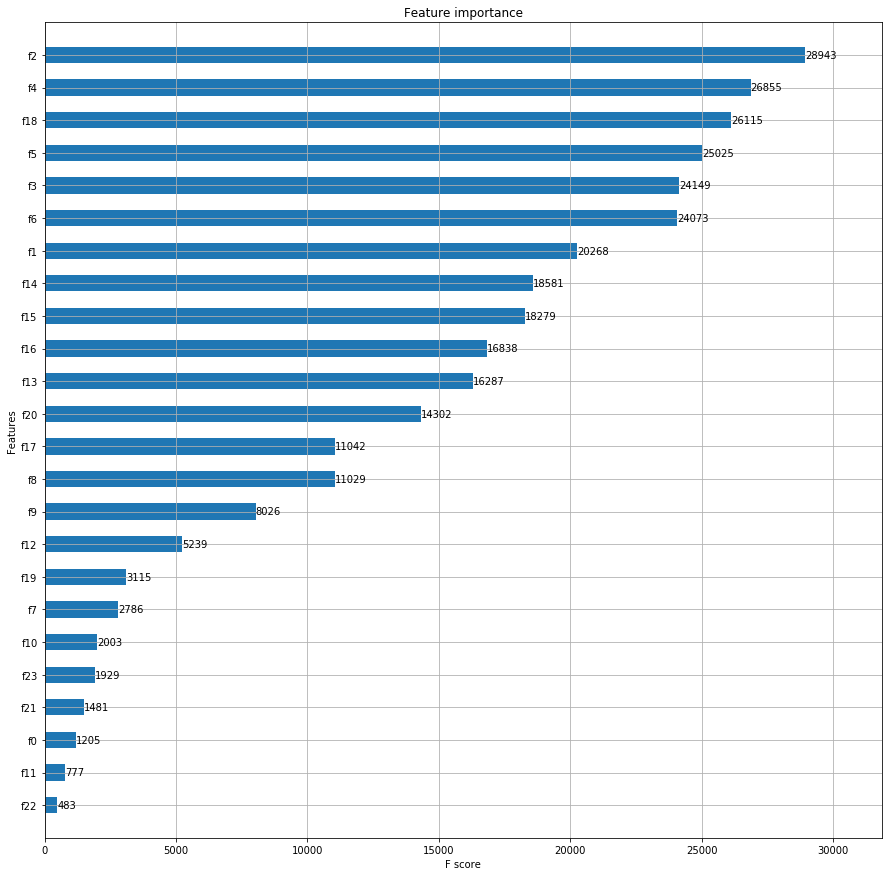

Accuracy: 88.09%
0.8624961881635673


In [54]:
### plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig_4,ax_4 = plt.subplots(figsize=(15,15))
plot_importance(model_4,
                height=0.5,
                ax=ax_4,
                max_num_features=64)
plt.show()

### make prediction for test data
#y_predicted = model.predict(x_test)
y_predicted_4_prob = model_4.predict_proba(x_validation_4,ntree_limit=785)

y_predicted_4 = np.argmax(y_predicted_4_prob.reshape( len(y_validation_4), 8 ),axis = 1)   #转化为类别

accuracy_4 = accuracy_score(y_validation_4, y_predicted_4)
print("Accuracy: %.2f%%" % (accuracy_4 * 100.0))

from sklearn.metrics import f1_score
 
score_4 = f1_score(y_validation_4, y_predicted_4,average='macro')
print(score_4)

In [55]:
### make prediction for test data
import warnings
warnings.filterwarnings("ignore")
y_predicted_test = []
line_predicted = []
dict_label_1 = {0:90063345,1:90109916, 2:90155946}
dict_label_4 = {0:89950168,1:89950166, 2:99999828,3: 99999827, 4:99999830, 5:89950167,6: 99999826, 7:99999825}
print("begin predict")
y_predicted_test_1_prob = model_1.predict_proba(x_test[:,1:len(x_test[0])], ntree_limit=131)
y_predicted_test_1 = np.argmax(y_predicted_test_1_prob.reshape( len(x_test), 3 ),axis = 1)   #转化为类别
y_predicted_test_4_prob = model_4.predict_proba(x_test[:,1:len(x_test[0])], ntree_limit=288) 
y_predicted_test_4 = np.argmax(y_predicted_test_4_prob.reshape( len(x_test), 8 ),axis = 1)   #转化为类别

index = 0
for line in x_test:
    if (line[0]==1):
        line_predicted = dict_label_1[y_predicted_test_1[index]]
    elif (line[0]==4):
        line_predicted = dict_label_4[y_predicted_test_4[index]]
    else:
        line_predicted = dict_label_4[y_predicted_test_4[index]]
    y_predicted_test.append(line_predicted)
    index += 1
print(y_predicted_test[0])

begin predict
90063345


In [56]:
header = [('user_id','current_service')]

with open('xgboost_submission.csv', 'w') as f:
    writer = csv.writer(f,lineterminator='\n')
    writer.writerows(header)
    for i in range(len(id_test)):
        writer.writerows([(id_test[i],y_predicted_test[i])])

print('done')

done


In [10]:
#保存成python支持的文件格式pickle
import pickle
with open('RandomF.pickle', 'wb') as fw:
    pickle.dump(estimator, fw)
    
## 如需加载.pickle
#with open('deci.pickle', 'rb') as fr:
#    new_estimator = pickle.load(fr)
#    print new_estimator.predict(x_test)

NameError: name 'estimator' is not defined